<a href="https://colab.research.google.com/github/monica-g0/mineria_de_datos/blob/main/Ej6_%C3%81rboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# librerías
import numpy as np
import pandas as pd

In [4]:
#Primer visualización de la base de datos.
df = pd.read_csv("pima-indians-diabetes.csv")
df

,embarazos,glucosa,presion,piel,prueba,bmi,dpf,edad,clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# se calcula la impureza de gini
def gini_impurity(df):
    clase = df['clase'].value_counts()
    total_samples = len(df)
    gini = 1 - sum((clase / total_samples) ** 2)
    return gini

# EN TODO EL dataset, se calcula la impureza de gini.
initial_gini = gini_impurity(df)
print(f'Impureza Gini inicial: {initial_gini}')

Impureza Gini inicial: 0.45437282986111116


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   embarazos  768 non-null    int64  
 1   glucosa    768 non-null    int64  
 2   presion    768 non-null    int64  
 3   piel       768 non-null    int64  
 4   prueba     768 non-null    int64  
 5   bmi        768 non-null    float64
 6   dpf        768 non-null    float64
 7   edad       768 non-null    int64  
 8   clase      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
df.isnull().sum()

embarazos    0
glucosa      0
presion      0
piel         0
prueba       0
bmi          0
dpf          0
edad         0
clase        0
dtype: int64

[Text(0.5111844044811321, 0.9722222222222222, 'glucosa <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]'),
 Text(0.23237273977987422, 0.9166666666666666, 'edad <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]'),
 Text(0.12028301886792453, 0.8611111111111112, 'dpf <= 0.494\ngini = 0.155\nsamples = 271\nvalue = [248, 23]'),
 Text(0.0770440251572327, 0.8055555555555556, 'presion <= 83.5\ngini = 0.096\nsamples = 179\nvalue = [170, 9]'),
 Text(0.040880503144654086, 0.75, 'glucosa <= 111.5\ngini = 0.059\nsamples = 165\nvalue = [160, 5]'),
 Text(0.018867924528301886, 0.6944444444444444, 'presion <= 51.0\ngini = 0.016\nsamples = 125\nvalue = [124, 1]'),
 Text(0.012578616352201259, 0.6388888888888888, 'presion <= 49.0\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.006289308176100629, 0.5833333333333334, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.018867924528301886, 0.5833333333333334, 'prueba <= 76.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.01257

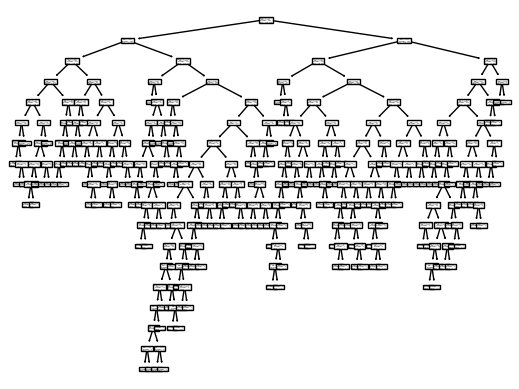

In [10]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

features = ['glucosa', 'presion', 'prueba', 'dpf', 'edad']

X = df[features]
y = df['clase']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)